In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck

import scipy.stats as st
import warnings
import scikit_posthocs as sp
warnings.filterwarnings("ignore", category=FutureWarning) 

In [25]:
df = pd.read_excel('./Гистоморфометрия.xlsx')
df = df.drop(columns='Animal')
df.head()

,Group,Time,Full_defect,Forward_defect
0,ГКЦ,7,16.10424,14.60
1,ГКЦ,7,9.00865,7.83
2,ГКЦ,7,9.81366,9.46
3,ГКЦ,7,9.01195,8.53
4,ГКЦ,7,11.02615,9.72


In [26]:
first_hist = df[df['Time']==7][['Group', 'Time', 'Full_defect']]
first_hist.head()

,Group,Time,Full_defect
0,ГКЦ,7,16.10424
1,ГКЦ,7,9.00865
2,ГКЦ,7,9.81366
3,ГКЦ,7,9.01195
4,ГКЦ,7,11.02615


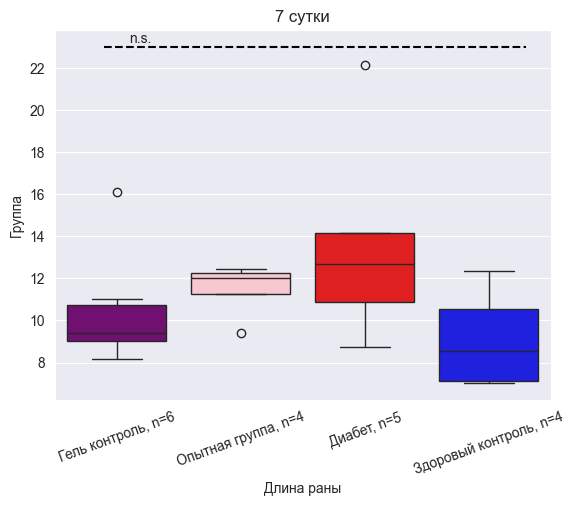

In [27]:
plt.title('7 сутки')
plt.xlabel('Длина раны')
plt.ylabel('Группа')
plt.axhline(xmin=0.1, xmax=0.95, y=23, linestyle='--', color='black')
plt.text(y=23.2, x=0.1, s='n.s.')
my_colors = {'ГКЦ': 'purple', 'ГОЦ': 'pink', 'СДК+': 'red', 'СДК-':'blue'}
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Гель контроль, n=6', 'Опытная группа, n=4', 'Диабет, n=5', 'Здоровый контроль, n=4'], rotation=20)
sns.boxplot(data=first_hist, x='Group', y='Full_defect', palette=my_colors)

plt.show()

In [28]:
st.kruskal(first_hist[first_hist['Group'] == 'ГКЦ']['Full_defect'], first_hist[first_hist['Group'] == 'ГОЦ']['Full_defect'], first_hist[first_hist['Group'] == 'СДК+']['Full_defect'], first_hist[first_hist['Group'] == 'СДК-']['Full_defect'])

KruskalResult(statistic=3.9773684210526383, pvalue=0.2639183244899271)

In [29]:
# Second plani
second_hist = df[df['Time']==14][['Group', 'Time', 'Full_defect']]
second_hist.head()

,Group,Time,Full_defect
6,ГКЦ,14,4.00306
7,ГКЦ,14,12.91932
8,ГКЦ,14,17.64592
9,ГКЦ,14,6.96801
19,ГОЦ,14,3.49560


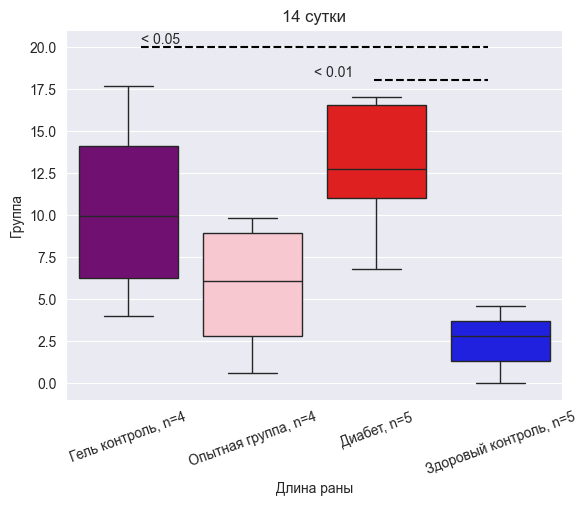

In [30]:
plt.title('14 сутки')
plt.xlabel('Длина раны')
plt.ylabel('Группа')

plt.axhline(xmin=0.15, xmax=0.85, y=20, linestyle='--', color='black')
plt.text(y=20.2, x=0.1, s='< 0.05')

plt.axhline(xmin=0.62, xmax=0.85, y=18, linestyle='--', color='black')
plt.text(y=18.2, x=1.5, s='< 0.01')

my_colors = {'ГКЦ': 'purple', 'ГОЦ': 'pink', 'СДК+': 'red', 'СДК-':'blue'}
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Гель контроль, n=4', 'Опытная группа, n=4', 'Диабет, n=5', 'Здоровый контроль, n=5'], rotation=20)
sns.boxplot(data=second_hist, x='Group', y='Full_defect', palette=my_colors)

plt.show()

In [31]:
st.kruskal(second_hist[second_hist['Group'] == 'ГКЦ']['Full_defect'], second_hist[second_hist['Group'] == 'ГОЦ']['Full_defect'], second_hist[second_hist['Group'] == 'СДК+']['Full_defect'], second_hist[second_hist['Group'] == 'СДК-']['Full_defect'])

KruskalResult(statistic=9.63157894736841, pvalue=0.021972004520384596)

In [32]:
sp.posthoc_dunn([second_hist[second_hist['Group'] == 'ГКЦ']['Full_defect'], second_hist[second_hist['Group'] == 'ГОЦ']['Full_defect'], second_hist[second_hist['Group'] == 'СДК+']['Full_defect'], second_hist[second_hist['Group'] == 'СДК-']['Full_defect']])

,1,2,3,4
1,1.000000,0.185326,0.716600,0.023709
2,0.185326,1.000000,0.078546,0.386692
3,0.716600,0.078546,1.000000,0.005369
4,0.023709,0.386692,0.005369,1.000000


In [33]:
third_hist = df[df['Time']==21][['Group', 'Time', 'Full_defect']]
third_hist

,Group,Time,Full_defect
10,ГКЦ,21,0.000000
11,ГКЦ,21,0.346577
12,ГКЦ,21,0.000000
13,ГКЦ,21,0.000000
14,ГКЦ,21,0.000000
23,ГОЦ,21,1.422900
24,ГОЦ,21,0.000000
25,ГОЦ,21,0.000000
26,ГОЦ,21,0.000000
37,СДК+,21,3.169210


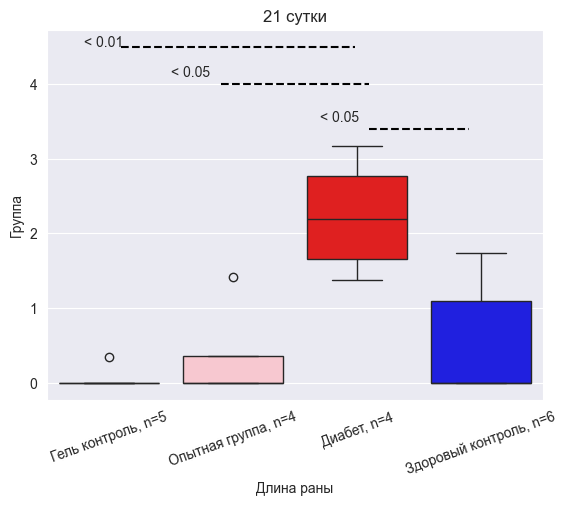

In [34]:
plt.title('21 сутки')
plt.xlabel('Длина раны')
plt.ylabel('Группа')

plt.axhline(xmin=0.15, xmax=0.62, y=4.5, linestyle='--', color='black')
plt.text(y=4.5, x=-0.2, s='< 0.01')

plt.axhline(xmin=0.35, xmax=0.65, y=4, linestyle='--', color='black')
plt.text(y=4.1, x=0.5, s='< 0.05')

plt.axhline(xmin=0.65, xmax=0.85, y=3.4, linestyle='--', color='black')
plt.text(y=3.5, x=1.7, s='< 0.05')

my_colors = {'ГКЦ': 'purple', 'ГОЦ': 'pink', 'СДК+': 'red', 'СДК-':'blue'}
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Гель контроль, n=5', 'Опытная группа, n=4', 'Диабет, n=4', 'Здоровый контроль, n=6'], rotation=20)
sns.boxplot(data=third_hist, x='Group', y='Full_defect', palette=my_colors)

plt.show()

In [35]:
st.kruskal(third_hist[third_hist['Group'] == 'ГКЦ']['Full_defect'], third_hist[third_hist['Group'] == 'ГОЦ']['Full_defect'], third_hist[third_hist['Group'] == 'СДК+']['Full_defect'], third_hist[third_hist['Group'] == 'СДК-']['Full_defect'])

KruskalResult(statistic=9.454565217391316, pvalue=0.023819655040065807)

In [36]:
sp.posthoc_dunn([third_hist[third_hist['Group'] == 'ГКЦ']['Full_defect'].sort_values(), third_hist[third_hist['Group'] == 'ГОЦ']['Full_defect'].sort_values(), third_hist[third_hist['Group'] == 'СДК+']['Full_defect'], third_hist[third_hist['Group'] == 'СДК-']['Full_defect']])

,1,2,3,4
1,1.000000,0.813505,0.004860,0.520569
2,0.813505,1.000000,0.014372,0.720697
3,0.004860,0.014372,1.000000,0.020129
4,0.520569,0.720697,0.020129,1.000000


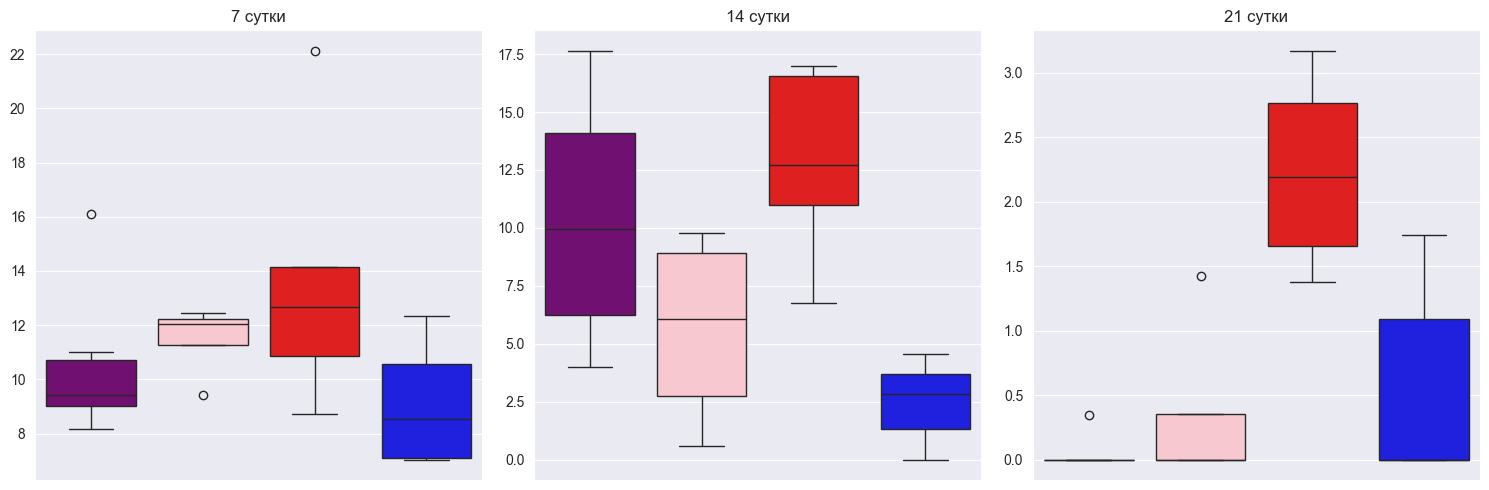

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.set_style('darkgrid')
sns.boxplot(ax=ax[0], data=first_hist, x='Group', y='Full_defect', palette=my_colors)
ax[0].set_title('7 сутки')

sns.boxplot(ax=ax[1], data=second_hist, x='Group', y='Full_defect', palette=my_colors)
ax[1].set_title('14 сутки')

sns.boxplot(ax=ax[2], data=third_hist, x='Group', y='Full_defect', palette=my_colors)
ax[2].set_title('21 сутки')

for axes in ax.flat:
    axes.set_xticks([])
    axes.set_xlabel('')
    axes.set_ylabel('')

plt.tight_layout()
plt.show()

# Глюкометрия

In [38]:
# 20.10.23
before_stz = [7.8, 8.4, 6.2, 7.7, 6, 8.3, 6.8, 7.7, 7.5, 7.8, 6.9, 6.9, 5.5, 7.6, 7.9]
after_stz = [13.3, 7.5, 7.2, 33.3, 9.4, 33.3, 33.3, 33.3, 33.3, 11.7, 33.3, 33.3, 33.3, 33, 33.3, 33.3, 33.3, 19.3, 30.5, 33.3, 33.3, 25.8, 31.7, 33.3, 33.3, 33.3, 33.3, 32.1, 24.4, 33.3, 33.3, 33.3, 8.9, 33.3, 33.3, 33.3, 33.3, 33.3, 33.3, 30.2, 33.3, 33.3, 33.3, 33.3, 33.3, 33.3, 8.3, 26.1, 33.3, 30.3, 33.3, 33.3, 33.3, 29.9, 33.3, 7.8, 33.3, 30, 33.3, 33.3, 33.3, 33.3, 29.8, 33.3, 32.6, 31.1, 33,3]
glucose_groups = [before_stz, after_stz]
print(np.array(before_stz).mean(), np.array(after_stz).mean())

7.2666666666666675 29.099999999999998


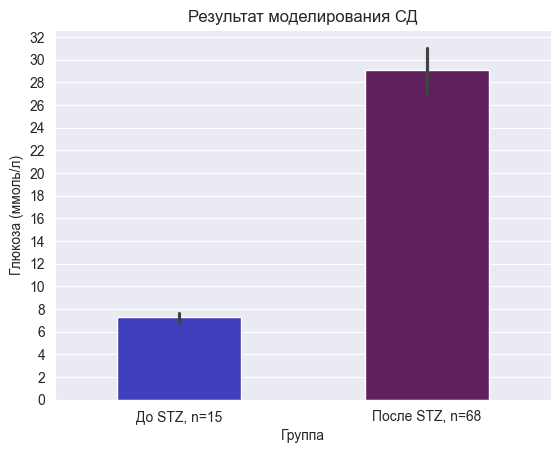

In [39]:
plt.xlabel('Группа')
plt.ylabel('Глюкоза (ммоль/л)')
plt.xticks(np.arange(0, 2, step=1))
plt.yticks(np.arange(0, 33, step=2))
plt.title('Результат моделирования СД')
colors = {0: 'blue', 1:'purple'}
x = [f'До STZ, n={len(before_stz)}', f'После STZ, n={len(after_stz)}']
plt.xticks(np.arange(2), x)
sns.set_style('whitegrid')
sns.barplot(glucose_groups, width=0.5, palette=colors, saturation=0.5)
plt.show()

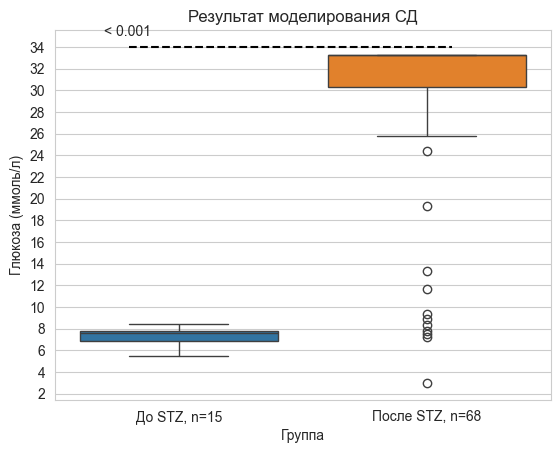

In [40]:
plt.xlabel('Группа')
plt.ylabel('Глюкоза (ммоль/л)')
plt.xticks(np.arange(0, 2, step=1))
plt.yticks(np.arange(0, 35, step=2))
plt.axhline(xmin=0.15, xmax=0.8, y=34, linestyle='--', color='black')
plt.text(y=35, x=-0.3, s='< 0.001')
plt.title('Результат моделирования СД')
colors = {0: 'blue', 1:'purple'}
x = [f'До STZ, n={len(before_stz)}', f'После STZ, n={len(after_stz)}']
plt.xticks(np.arange(2), x)
sns.set_style('darkgrid')
sns.boxplot(data=glucose_groups)
plt.show()

In [41]:
st.mannwhitneyu(before_stz, after_stz)

MannwhitneyuResult(statistic=38.0, pvalue=1.8115287827840742e-09)

In [42]:
# Уровень глюкозы на 14 сутки
diabetes_glucose = [15.2, 33.1, 32.7, 33.3, 33.3, 33.3, 33.3, 33.3, 33.3, 33.3, 26.6, 33.3, 16.7, 17.4, 33.3]
normal_glucose = [7.6, 7.5, 7.5, 6.4, 7.8, 7.0]
glucose_level_14 = [np.array(normal_glucose).mean(), np.array(diabetes_glucose).mean()]
glucose_level_14

[7.3, 29.42666666666667]

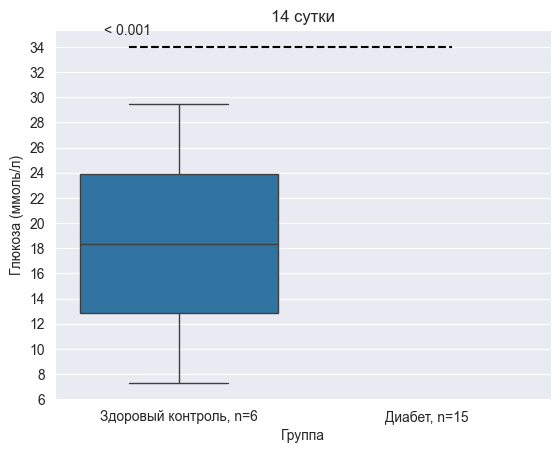

In [43]:
plt.xlabel('Группа')
plt.ylabel('Глюкоза (ммоль/л)')
plt.xticks(np.arange(0, 2, step=1))
plt.yticks(np.arange(0, 35, step=2))
plt.axhline(xmin=0.15, xmax=0.8, y=34, linestyle='--', color='black')
plt.text(y=35, x=-0.3, s='< 0.001')
plt.title('14 сутки')
colors = {0: 'blue', 1:'purple'}
x = [f'Здоровый контроль, n={len(normal_glucose)}', f'Диабет, n={len(diabetes_glucose)}']
plt.xticks(np.arange(2), x)
sns.set_style('darkgrid')
sns.boxplot(data=glucose_level_14)
plt.show()

In [44]:
diabetes_glucose = [33.3, 33.3, 33.3, 33.3, 33.3, 33.3, 28.8, 31.6, 31.1, 33.3, 32.9, 33.3, 33.3]
normal_glucose = [7.6, 7.5, 7.5, 6.4, 7.8, 7.0]
glucose_level_21 = [np.array(normal_glucose).mean(), np.array(diabetes_glucose).mean()]
glucose_level_21

[7.3, 32.62307692307692]

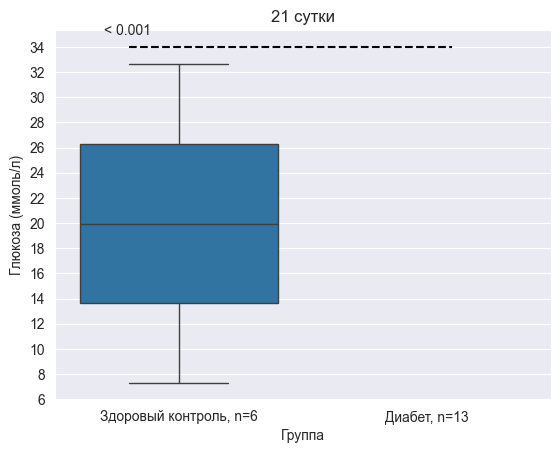

In [45]:
plt.xlabel('Группа')
plt.ylabel('Глюкоза (ммоль/л)')
plt.xticks(np.arange(0, 2, step=1))
plt.yticks(np.arange(0, 35, step=2))
plt.axhline(xmin=0.15, xmax=0.8, y=34, linestyle='--', color='black')
plt.text(y=35, x=-0.3, s='< 0.001')
plt.title('21 сутки')
colors = {0: 'blue', 1:'purple'}
x = [f'Здоровый контроль, n={len(normal_glucose)}', f'Диабет, n={len(diabetes_glucose)}']
plt.xticks(np.arange(2), x)
sns.set_style('darkgrid')
sns.boxplot(data=glucose_level_21)
plt.show()

In [46]:
diabetes_glucose = [32.2, 31.2, 31.9, 33.3, 33.3, 33.3, 26.6, 33.3, 25.3, 33.3, 33.3, 33.3, 33.3, 29.6, 30.8]
normal_glucose = [7.9, 7.9, 8.2, 7.2, 7.7]
glucose_level_7 = [normal_glucose, diabetes_glucose]

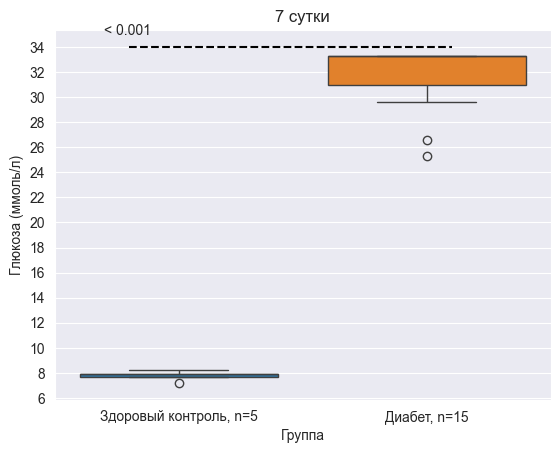

In [47]:
plt.xlabel('Группа')
plt.ylabel('Глюкоза (ммоль/л)')
plt.xticks(np.arange(0, 2, step=1))
plt.yticks(np.arange(0, 35, step=2))
plt.axhline(xmin=0.15, xmax=0.8, y=34, linestyle='--', color='black')
plt.text(y=35, x=-0.3, s='< 0.001')
plt.title('7 сутки')
colors = {0: 'blue', 1:'purple'}
x = [f'Здоровый контроль, n={len(normal_glucose)}', f'Диабет, n={len(diabetes_glucose)}']
plt.xticks(np.arange(2), x)
sns.set_style('darkgrid')
sns.boxplot(data=glucose_level_7)
plt.show()